In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score

In [13]:
dataset = pd.read_csv('dataset.csv')
X= dataset.drop(columns=['url','status'])
Y= dataset['status']
X.head()

,length_url,abnormal_subdomain,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic
0,46,0,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0
1,128,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0
2,52,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0
3,21,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0
4,28,0,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0


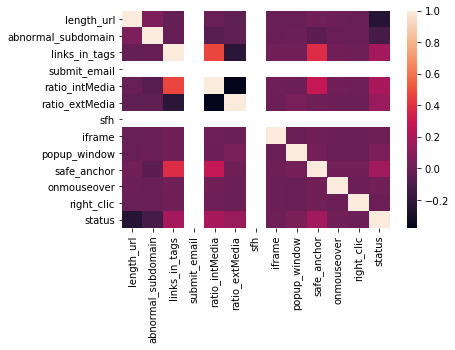

In [14]:
df = dataset.drop(columns='url')
sns.heatmap(dataset.corr())

In [15]:
# df1 = pd.DataFrame(10*np.random.randn(10, 3))
# df1.iloc[0, 0] = 0 # So we can check the == 0 condition  use X insted of df1
df1 = pd.DataFrame(X['length_url'])
# df1.iloc[0, 0] = 0
# 1 => legitimate
# -1 => physhing
# 0 => suspecious

conds = [df1.values < 54 , df1.values > 75]
choices = ['1', '-1']

col = pd.DataFrame(np.select(conds, choices, default='0'),
             index=df1.index,
             columns=df1.columns)

col.head()

,length_url
0,1
1,-1
2,1
3,1
4,1


In [16]:
# df = pd.DataFrame(X)
X = X.assign(length_url=col['length_url'])
X.head()

,length_url,abnormal_subdomain,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic
0,1,0,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0
1,-1,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0
2,1,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0
3,1,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0
4,1,0,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0


In [17]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2,random_state=2)

In [18]:
# test using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

c:\users\lakru\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
logreg_predict= model_1.predict(test_X)

In [21]:
accuracy_score(logreg_predict,test_Y)

0.708125

In [22]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       765
           1       0.72      0.71      0.72       835

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600

